In [1]:
from htke.load_data import *
from htke.process_ir_data import *
from htke.load_conditions import *
from htke.spka import *
from htke.rpka import *
pd.options.mode.chained_assignment = None  # default='warn' stops the slice error

### Go to directory

In [2]:
%pwd
%cd ir_data/GL-06-09

C:\Users\Paul Dingwall\Documents\github\htke\ir_data\GL-06-09


### Load Raw Data

In [3]:
# Instantiate class
Data()

# Load data to dataframe
ir_data = Data.read()

# Visualise the data
#Data.plot(ir_data)

#ir_data

### Find the Peaks in the Raw Data

In [4]:
# Instantiate class
peaks = Peaks(ir_data)

# List all the wavelengths observed
print([col for col in ir_data.columns if 'Peak' in col])

['Peak at 1700 cm-1', 'Peak at 1746 cm-1']


In [5]:
# Choose peak
peak_of_interest = 'Peak at 1700 cm-1'

# Auto find prominence and height to match number of conditions
prominence = peaks.auto_prom(peak_of_interest)
height = peaks.auto_height(peak_of_interest)
residence_time = peaks.auto_area(peak_of_interest, prominence, 5, 10)

print('Prominence threshold =', np.round(prominence, 4))
print('Height threshold =', np.round(height, 4))
print('Residence time =', np.round(residence_time, 2))

Prominence threshold = 0.0287
Height threshold = 0.1957
Residence time = 7.65


,Prominence,Experimental Area,Fitted Area
0,-0.922150,-0.957334,-0.953801
1,-0.030831,0.529299,0.494865
2,-0.929366,-0.977675,-0.965467
3,-0.920296,-0.955468,-0.960705
4,-0.991474,-0.993777,-0.995478
Sum,-3.794116,-3.354954,-3.380585


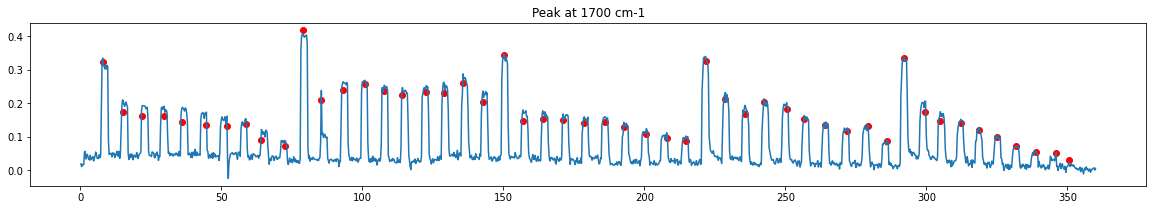

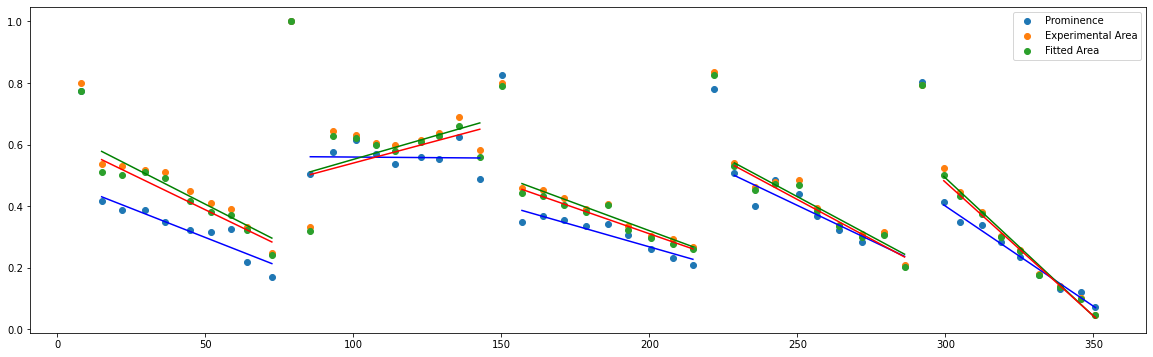

In [17]:
## PROMINENCE ALL WAVELENGTHS: Determine the peak prominences of every wavelength
#processed_ir_data = peaks.prominence_all(prominence)

## PROMINENCE: Determine the peak prominences of a single wavelength
processed_ir_data = peaks.prominence(prominence, peak_of_interest)

## HEIGHT: # Determine the peak heights of a single wavelength
#processed_ir_data = peaks.height(height, peak_of_interest)

## EXP AREA: Determine the experimental areas of a single wavelength
#processed_ir_data = peaks.exp_area(prominence, residence_time, peak_of_interest)

## FITTED AREA - SINGLE PEAK: Fit a gaussian to a single peak and determine it's area
#processed_ir_data= peaks.fitted_area_sp(prominence, residence_time, peak_of_interest, 0)

## FITTED AREA: Determine the fitted areas of a single wavelength
#processed_ir_data = peaks.fitted_area(prominence, residence_time, peak_of_interest)

## Visualise which peaks have been picked - single peak
peaks.plot(processed_ir_data, peak_of_interest)

residence_time = 4.5

## Compare prominence, height, experimental area, and fitted area
r2, compare = peaks.compare_no_height(prominence, residence_time, peak_of_interest, 5, 10)
# NOTE: Areas seem to give the best value when the starting point is exactly on the peak (no baseline before)

#processed_ir_data
r2

In [7]:
# Trim df (if requried)
#compare = compare.iloc[:-39,:]

# Change a single cell
#processed_ir_data.iloc[0,1] = 0.46
#processed_ir_data

# Read experimental conditions and add to dataframe

In [18]:
Conditions()
experimental_data = Conditions.read(processed_ir_data)
#experimental_data

Inputs seem good: IR Datapoints =  50 , Number of conditions =  50


### Create the SPKA profiles

In [19]:
spka = SPKA(experimental_data)

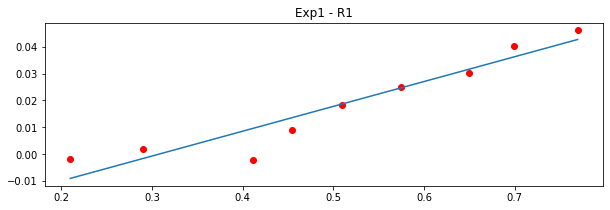

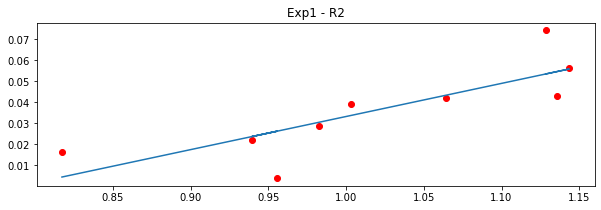

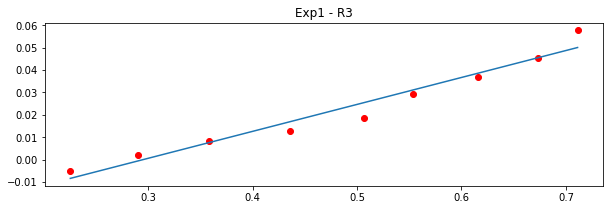

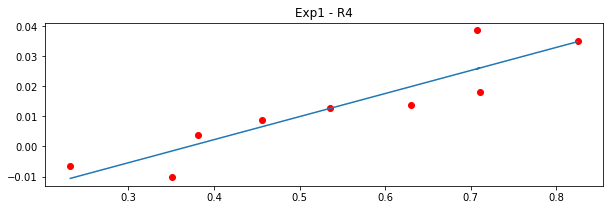

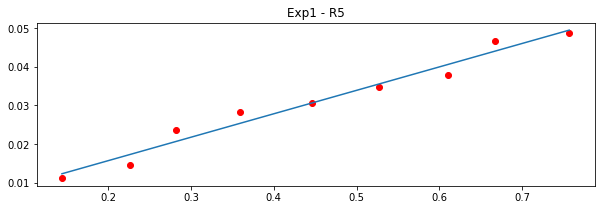

In [20]:
spka_data = spka.spka('[A]0')
spka_data
spka.plot(spka_data)

## To Compare
#r2 = spka.compare('[A]0')
#r2

### Perform RPKA

In [123]:
rpka = RPKA(spka_data)

KeyError: '[Rat]'

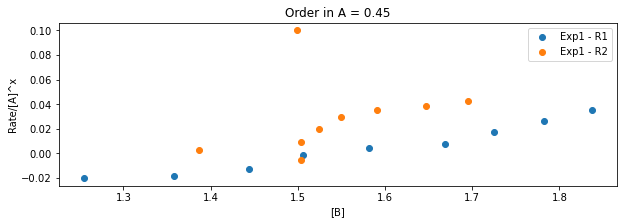

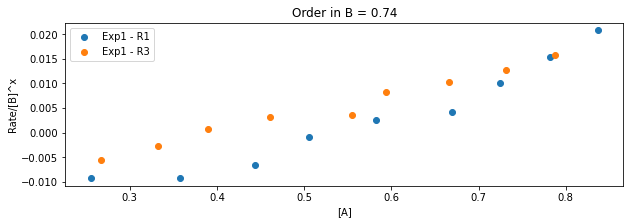

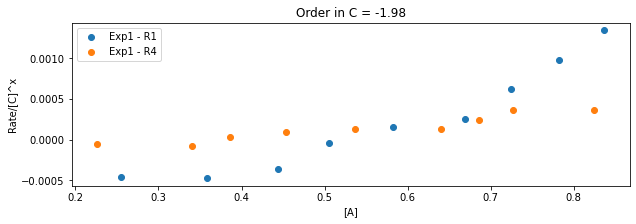

In [124]:
rpka_data = rpka.diff_excess()
#rpka_data

In [136]:
# Set up excelwriter
writer = pd.ExcelWriter('Processed - 1700 - Prominence.xlsx', engine='xlsxwriter')
workbook=writer.book

# Output data
#rpka_data.to_excel(writer, sheet_name='RPKA Data', startrow=0 , startcol=0, index=False)
spka_data.to_excel(writer, sheet_name='SPKA Data', startrow=0 , startcol=0, index=False)
ir_data.to_excel(writer, sheet_name='IR Data', startrow=0 , startcol=0, index=False)
processed_ir_data.to_excel(writer, sheet_name='Processed IR', startrow=0 , startcol=0, index=False)
experimental_data.to_excel(writer, sheet_name='Experimental Data', startrow=0 , startcol=0, index=False)
#conditions.to_excel(writer, sheet_name='Conditions', startrow=0 , startcol=0, index=False)

# Save
writer.save()

# This won't work if the excel file is open